In [1]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import data_analysis
import importlib
importlib.reload(data_analysis)

%matplotlib inline

In [2]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

# $<u(z)>_x (t)$

In [3]:
print(z[0,43 : 48])

[0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [13]:
print(np.shape(np.mean(u[:,:,43:48], axis = 2)))

uz = np.mean(np.mean(u[:,:,43:48], axis = 2), axis = 1)
print(np.shape(uz))
print(np.shape(time))
print(len(time))

(6249, 81)
(6249,)
(6249,)
6249


In [14]:
uz_mean = np.mean(uz)

In [75]:
from scipy.signal import find_peaks
min_indices = find_peaks(-uz, distance = 50, height = 800)[0]
max_indices = find_peaks(uz, distance = 50, height = -150)[0]

print(len(min_indices))
print(len(max_indices))

19
32


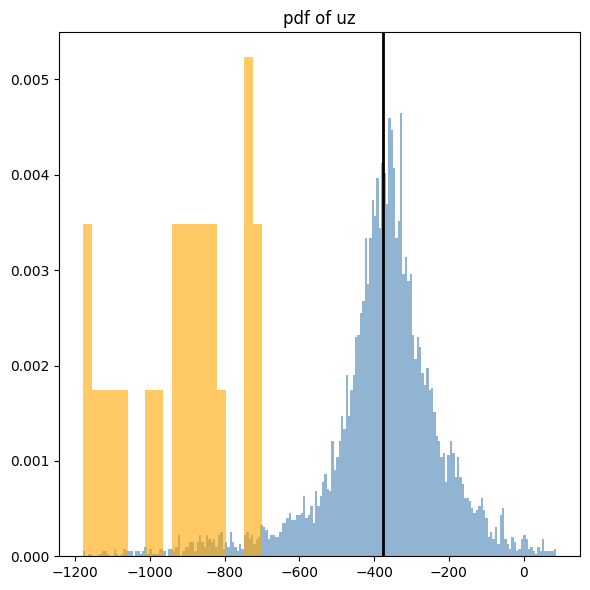

In [16]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(uz, bins=200, density=True, alpha=0.6, color='steelblue', histtype = 'bar')
ax.hist([uz[i] for i in min_indices], bins=20, density=True, alpha=0.6, color='orange', histtype = 'bar')

ax.axvline(uz_mean, label = 'uzmean', c = 'k', linewidth = 2)
ax.set_title(f'pdf of uz')
plt.tight_layout()
plt.show()


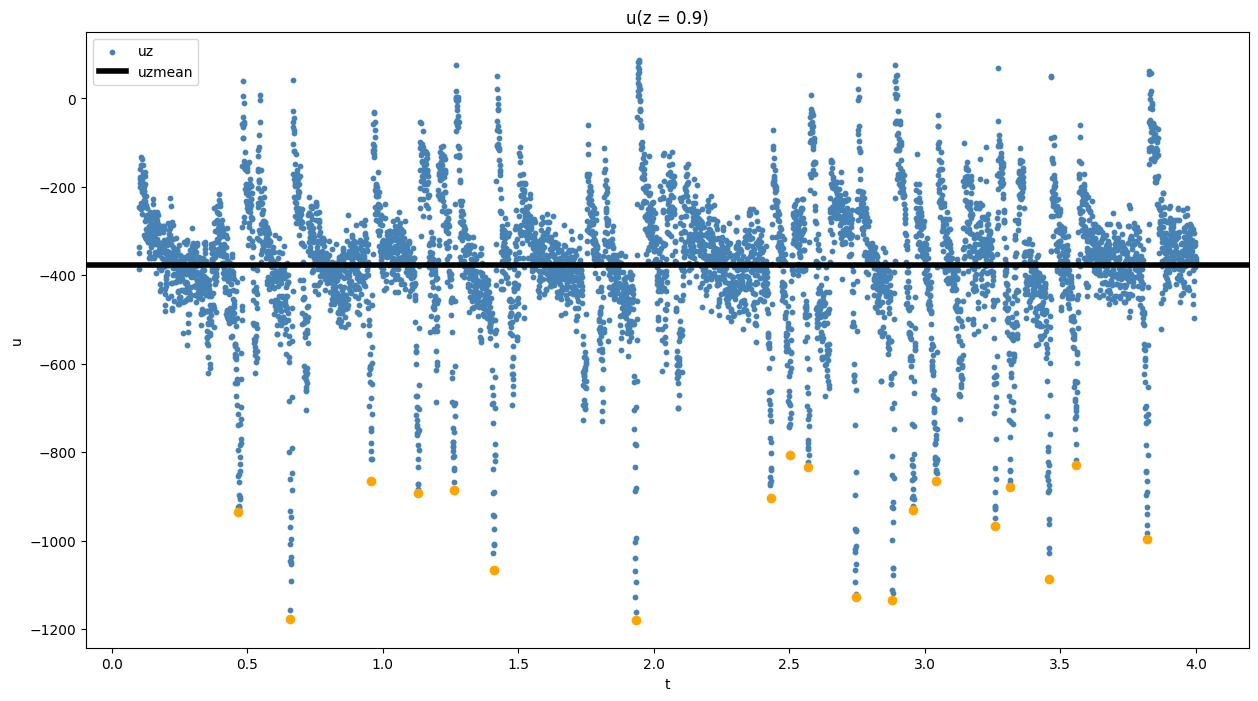

In [76]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (15, 8))
ax.scatter(time, uz, s = 10, c = 'steelblue', label = 'uz')
ax.scatter([time[i] for i in min_indices], [uz[i] for i in min_indices], color = 'orange')
# ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')

ax.axhline(uz_mean, c = 'k', linewidth = 4, label = 'uzmean')
ax.set_title('u(z = 0.9)')
ax.set_ylabel('u')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [74]:
print(min_indices)
print(uz[4846])

[ 581  892  991 1369 1647 1859 2091 2615 2730 2924 3188 3728 3844 3954
 4230 4442 4570 4709 4846 5067 5159 5384 5543 5960]
-725.7162370293969


1369, 1647,  : full swipe


In [ ]:
for t in min_indices:
    fig, ax = plt.subplots(figsize = (15,5))
    ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
    cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
    cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
    cbar.ax.set_aspect('auto') 
    ax.set_title(f'Quiver plot at t = {t}')
    ax.set_aspect('equal')
    ax.set_ylim(0,1)
    ax.set_xlim(-4,4)
    plt.tight_layout()
    plt.show()

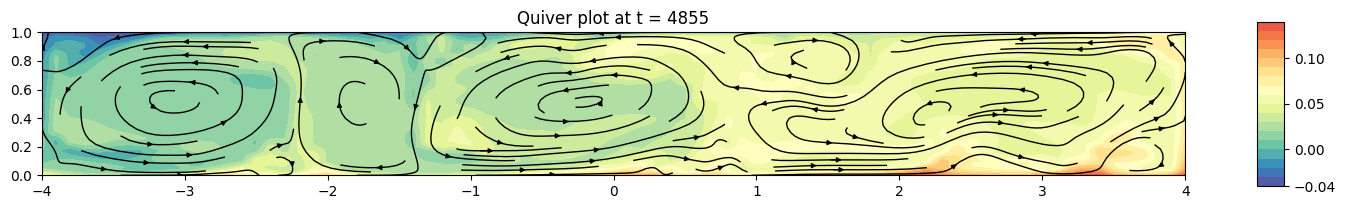

In [73]:
%matplotlib inline
t = 4855
fig, ax = plt.subplots(figsize = (15,5))
ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
cbar.ax.set_aspect('auto') 
ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
plt.tight_layout()
plt.show()

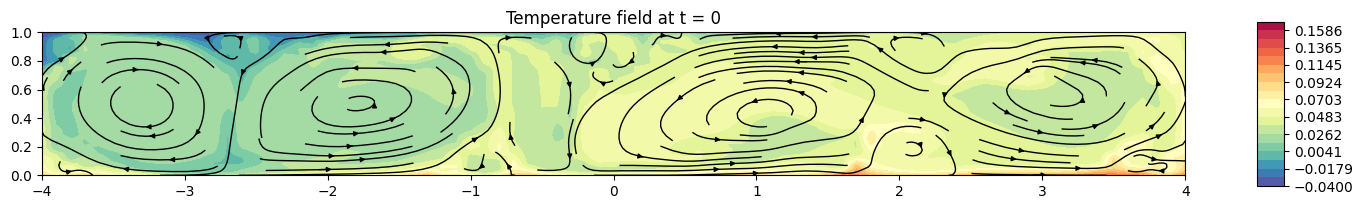

In [121]:
simulation.plot_T_field(0)

In [139]:
simulation.save_clip(2600, 3200, '/home/julielimonet/Documents/Stage_M2/results/data_analysis/')

In [3]:
import cv2
import os

video_name = 'T_field.avi'
image_folder = '/home/julielimonet/Documents/Stage_M2/results/data_analysis/'
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
img = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = img.shape

fps = 25
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can also use other codecs like MJPG, X264, etc.
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))  # Adjust the frame rate (fps) as needed

# Loop through the images and add them to the video
for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

# Release the video object
video.release()